In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
train_df = pd.read_csv("../data/data/processed/train_processed.csv")
test_df = pd.read_csv("../data/data/processed/test_processed.csv")

X_train = train_df.drop(columns=["subject", "activity_id", "activity"])
y_train = train_df["activity"]

X_test = test_df.drop(columns=["subject", "activity_id", "activity"])
y_test = test_df["activity"]

In [12]:
# Modelo base
model = LogisticRegression(max_iter=10, solver="lbfgs")

# Exemplo: selecionar 30 melhores features
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)

print("Número de features selecionadas:", rfe.n_features_)
print("Features selecionadas:", list(X_train.columns[rfe.support_]))

c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown i

Número de features selecionadas: 5
Features selecionadas: ['tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'fBodyAcc-std()-X', 'fBodyAccJerk-std()-Y', 'fBodyAccMag-std()']


c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown i

c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown i

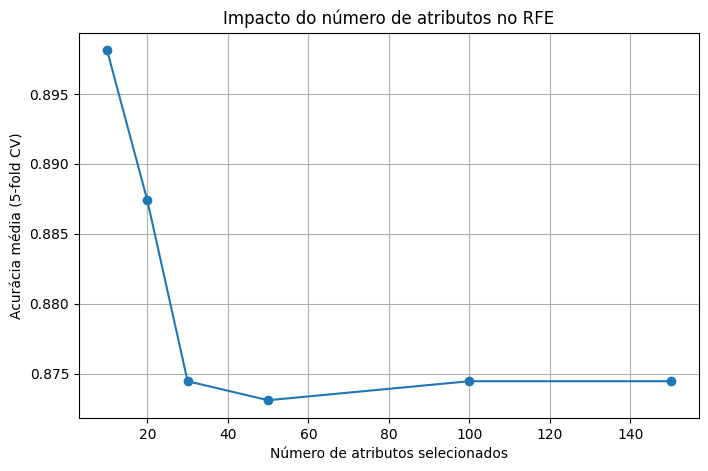

In [13]:
scores = []
n_features_range = [10, 20, 30, 50, 100, 150]  # você pode variar mais

for n in n_features_range:
    rfe = RFE(estimator=model, n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    score = cross_val_score(model, X_train_rfe, y_train, cv=5).mean()
    scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(n_features_range, scores, marker="o")
plt.xlabel("Número de atributos selecionados")
plt.ylabel("Acurácia média (5-fold CV)")
plt.title("Impacto do número de atributos no RFE")
plt.grid(True)
plt.show()

In [14]:
# Definir número ótimo (exemplo: 50)
best_n = 50
rfe_final = RFE(estimator=model, n_features_to_select=best_n)
rfe_final.fit(X_train, y_train)

selected_features_rfe = list(X_train.columns[rfe_final.support_])
print("Features escolhidas pelo RFE:", selected_features_rfe)

c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown i

Features escolhidas pelo RFE: ['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-std()-X', 'tGravityAcc-std()-Y', 'tGravityAcc-std()-Z', 'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z', 'tBodyGyro-std()-X', 'tBodyGyro-std()-Y', 'tBodyGyro-std()-Z', 'tBodyGyroJerk-std()-X', 'tBodyGyroJerk-std()-Y', 'tBodyGyroJerk-std()-Z', 'tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tGravityAccMag-mean()', 'tGravityAccMag-std()', 'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()', 'tBodyGyroMag-mean()', 'tBodyGyroMag-std()', 'tBodyGyroJerkMag-mean()', 'tBodyGyroJerkMag-std()', 'fBodyAcc-mean()-X', 'fBodyAcc-mean()-Y', 'fBodyAcc-std()-X', 'fBodyAcc-std()-Y', 'fBodyAcc-std()-Z', 'fBodyAccJerk-mean()-X', 'fBodyAccJerk-mean()-Y', 'fBodyAccJerk-mean()-Z', 'fBodyAccJerk-std()-X', 'fBodyAccJerk-std()-Y', 'fBodyAccJerk-std()-Z', 'fBodyGyro-mean()-X', 'fBodyGyro-std()-X', 'fBodyGyro-std()-Y', 'fBo

c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown i

In [15]:
#Aplicar o modelo de Regressão Logística com Lasso (L1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', max_iter=1000)
lasso_model.fit(X_train_scaled, y_train)

c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [16]:
# Analisar os coeficientes
coefs = lasso_model.coef_
n_zero_coefs = np.sum(np.all(coefs == 0, axis=0))

print(f"Total de atributos: {X_train.shape[1]}")
print(f"Atributos zerados pelo Lasso: {n_zero_coefs}")

selected_mask_lasso = np.any(coefs != 0, axis=0)
selected_features_lasso = list(X_train.columns[selected_mask_lasso])

print(f"Número de atributos selecionados pelo Lasso: {len(selected_features_lasso)}")
print("\nAtributos selecionados pelo Lasso:", selected_features_lasso)


Total de atributos: 66
Atributos zerados pelo Lasso: 18
Número de atributos selecionados pelo Lasso: 48

Atributos selecionados pelo Lasso: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-std()-X', 'tGravityAcc-std()-Y', 'tGravityAcc-std()-Z', 'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Z', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z', 'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z', 'tBodyGyro-std()-X', 'tBodyGyroJerk-mean()-X', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z', 'tBodyGyroJerk-std()-X', 'tBodyGyroJerk-std()-Y', 'tBodyGyroJerk-std()-Z', 'tBodyAccMag-std()', 'tGravityAccMag-std()', 'tBodyAccJerkMag-mean()', 'tBodyGyroMag-mean()', 'fBodyAcc-mean()-X', 'fBodyAcc-mean()-Y', 'fBodyAcc-mean()-Z', 'fBodyAcc-std()-X', 'fBodyAcc-std()-Y', 'fBodyAcc-std()-Z', 'fBodyAccJerk-mean()-Z', 'fBodyAccJerk-std()-X', 'fBodyAccJerk-std()-Y', 'fBodyA

In [17]:
# Comparar com o resultado do RFE
set_rfe = set(selected_features_rfe)
set_lasso = set(selected_features_lasso)

common_features = list(set_rfe.intersection(set_lasso))
unique_to_rfe = list(set_rfe.difference(set_lasso))
unique_to_lasso = list(set_lasso.difference(set_rfe))

print(f"Atributos em comum ({len(common_features)}): {common_features}")
print(f"\nAtributos exclusivos do RFE ({len(unique_to_rfe)}): {unique_to_rfe}")
print(f"\nAtributos exclusivos do Lasso ({len(unique_to_lasso)}): {unique_to_lasso}")


Atributos em comum (34): ['tGravityAcc-std()-X', 'fBodyAccJerk-std()-X', 'fBodyAccMag-mean()', 'fBodyAcc-std()-X', 'tBodyGyro-std()-X', 'fBodyGyro-std()-X', 'fBodyBodyAccJerkMag-std()', 'tBodyGyroJerk-std()-Z', 'tBodyAcc-std()-X', 'tGravityAcc-mean()-Y', 'tBodyGyroMag-mean()', 'fBodyAccJerk-mean()-Z', 'fBodyAccJerk-std()-Z', 'tGravityAcc-mean()-X', 'fBodyBodyGyroMag-std()', 'tGravityAcc-std()-Y', 'tBodyAccMag-std()', 'tBodyAccJerk-std()-Y', 'fBodyAcc-std()-Z', 'fBodyAccMag-std()', 'fBodyGyro-std()-Y', 'tBodyAccJerkMag-mean()', 'tBodyAccJerk-std()-Z', 'tBodyGyroJerk-std()-X', 'fBodyGyro-std()-Z', 'tGravityAccMag-std()', 'fBodyAcc-mean()-X', 'tGravityAcc-mean()-Z', 'tGravityAcc-std()-Z', 'fBodyAcc-std()-Y', 'fBodyBodyGyroJerkMag-mean()', 'fBodyAccJerk-std()-Y', 'tBodyGyroJerk-std()-Y', 'fBodyAcc-mean()-Y']

Atributos exclusivos do RFE (16): ['tBodyGyroMag-std()', 'tBodyAccJerk-std()-X', 'tGravityAccMag-mean()', 'fBodyGyro-mean()-X', 'tBodyAccJerkMag-std()', 'fBodyAccJerk-mean()-Y', 'fBod